# C1: TIME SERIES - BASICS

## Why Forecast?

- **Definition:** Forecasting is the process of predicting future values based on past and present data.  
- **Importance:**
  - Weather forecasting → helps agriculture  
  - Retail sales → inventory and staffing decisions  
  - Finance → stock price prediction and risk management  
  - Energy demand → electricity load forecasting  
- **General rule:** Forecasting is used when decisions today depend on the uncertain future.  

## How to Forecast?

1. **Understand the data**
   - Plot the time series to observe trend, seasonality, cyclic patterns, etc.  
   - Check **stationarity** (constant mean and variance over time).  

2. **Preprocess the data**
   - Handle missing values, outliers.  
   - Transform to stabilize variance or remove trend.  
   - Make stationary if required (differencing, detrending, decomposition).  

3. **Choose a forecasting approach**  
   There are 3 broad categories:  
   - **A. Statistical Models**  
     - ARIMA (AutoRegressive Integrated Moving Average): handles trend; SARIMA handles seasonality.  
     - Exponential Smoothing (Holt-Winters): good for trend + seasonality.  
   - **B. Machine Learning Models**  
     - Linear Regression, Random Forest, XGBoost → use lagged values and external features.  
   - **C. Deep Learning Models**  
     - RNN, LSTM, GRU, Transformers → capture long dependencies, complex seasonality.  

4. **Model training and evaluation**
   - Split into train and test sets (must be time-based, not random).  
   - Fit the model on training data.  
   - Forecast on test data.  
   - Evaluate with metrics: MAE, RMSE, MAPE.  

5. **Make Forecast**
   - Once the best model is found, retrain on full data.  
   - Forecast for future periods.  

## What is a Time Series?

- A time series is a sequence of observations recorded at equally spaced time intervals.  
- **Examples:**
  - Daily rainfall in mm  
  - Hourly stock price  
  - Weekly unemployment claims  
- **Contrast with regression datasets:**
  - Regression → independent rows (order doesn’t matter).  
  - Time series → dependent rows (order matters, e.g., yesterday affects today).  

## Revisiting Regression

- **Regression model:**  
  $y = f(x) + \epsilon$  
  Predictors $x$ explain outcome $y$.  

- **Time series model:**  
  $y_t = f(y_{t-1}, y_{t-2}, \dots) + \epsilon_t$  
  Past values of $y$ are predictors for the present.  

## Some Examples of Time Series

- **Business & Finance:** Stock prices, sales data, revenue.  
- **Economics:** GDP growth rate, inflation/CPI index, unemployment rate.  
- **Weather & Environment:** Daily temperature, rainfall, air quality index.  
- **Health:** COVID-19 daily cases, hospital admissions, heart rate data.  
- **Technology/Operations:** Website traffic, server CPU usage, electricity demand.  

## Components of a Time Series

- **Trend:** Long-term upward/downward movement.  
  *Example:* Population growth.  
- **Seasonality:** Repeating pattern at fixed intervals.  
  *Example:* Ice cream sales peak every summer.  
- **Cyclic:** Long-term ups/downs, but not in a fixed time frame.  
  *Example:* Economic recessions.  
- **Noise/Irregular:** Random fluctuations with no clear pattern.  
  *Example:* Sudden drop in airline travel due to COVID-19 lockdowns.  

## EDA for Time Series

- Plot the series.  
- Decompose → split into trend + seasonality + residuals.  
- Autocorrelation Function (ACF) → check relationship between current and lagged values.  

## Special Features of Time Series Data

1. **Time dependency:** Observations depend on previous observations.  
2. **Trend:** Long-term upward or downward movement.  
3. **Seasonality:** Patterns that repeat at fixed intervals.  
4. **Cyclic behavior:** Fluctuations over long, irregular periods.  
5. **Stationarity:** Constant mean and variance over time.  
6. **Autocorrelation:** Correlation of a series with its own past values.  
7. **Noise/Randomness:** Unpredictable fluctuations not explained by trend/seasonality.  

## Time Series Decomposition

- **Definition:** Splitting a time series into components: trend, seasonality, cycles, and residuals.  
- **Why decompose?**
  - To understand the structure of data.  
  - To separate predictable patterns from noise.  
  - To improve forecasting accuracy by modeling components separately.  

- **Types of decomposition:**
  1. **Additive decomposition:**  
     $Y_t = T_t + S_t + R_t$  
     - Trend, seasonality, residuals are additive.  
     - Works when seasonal variation is constant in size.  
     - *Example:* Ice cream sales always increase by ~500 units in summer.  
  2. **Multiplicative decomposition:**  
     $Y_t = T_t \times S_t \times R_t$  
     - Seasonal effect grows with the level of trend.  
     - Works when seasonal variation is proportional to trend.  
     - *Example:* If ice cream sales double in 10 years, seasonal peaks also double.  

- **Steps in decomposition:**
  1. Identify trend (using moving average, regression, etc.).  
  2. Estimate seasonality (repeated pattern after removing trend).  
  3. Compute residuals (what’s left after removing trend + seasonality).  

## Moving Average

- **Definition:** A moving average smooths a time series by taking the average of observations within a fixed-size window and “moving” the window forward.  

- **Types:**
  - **Simple Moving Average (SMA):**  
    Mean of last $k$ points, equal weights for all.  
    $SMA_t = \dfrac{y_{t-1} + y_{t-2} + \dots + y_{t-k}}{k}$  
  - **Weighted Moving Average (WMA):**  
    Recent values get higher weights.  
  - **Exponential Moving Average (EMA):**  
    Uses exponentially decreasing weights, giving more importance to recent data.  

- **Benefits of Moving Average:**
  - Smoothing: Removes random noise and shows trend clearly.  
  - Trend detection: Helps visualize long-term direction.  
  - Forecasting basis: Used in forecasting and technical analysis.  

- **Limitations of Moving Average:**
  - Loss of data at ends: First/last data points can’t be smoothed.  
  - Lag effect: Reacts slowly to sudden changes.  
  - Fixed window issue: Choice of $k$ is subjective (small $k$ → noisy; large $k$ → too smooth).  
  - Ignores seasonality: SMA doesn’t capture repeating seasonal patterns well.  
  - Equal weighting problem: Past observations may not be equally important, but SMA treats them equally.  


            Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121


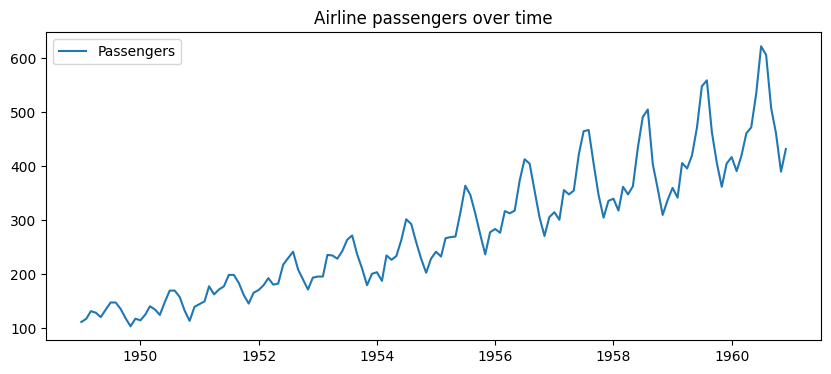

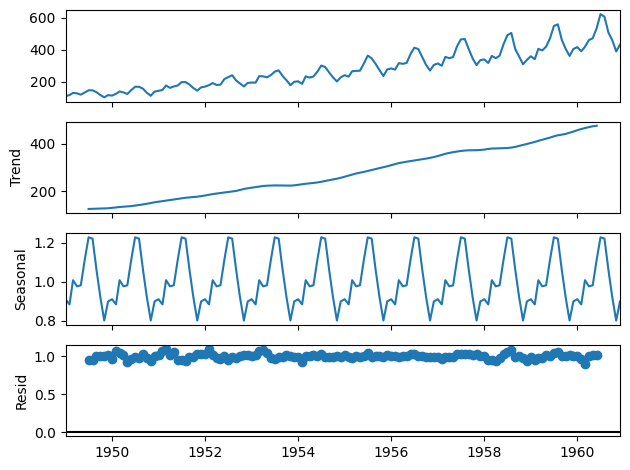

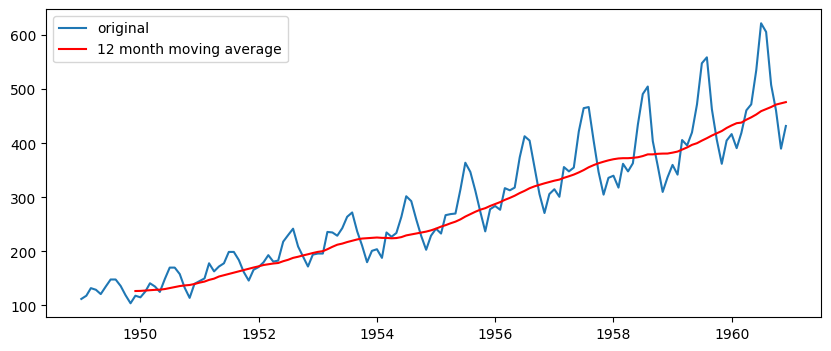

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
data = pd.read_csv(url, parse_dates=['Month'], index_col='Month')

# Quick look
print(data.head())

# Line plot
plt.figure(figsize=(10,4))
plt.plot(data, label="Passengers")
plt.title("Airline passengers over time")
plt.legend()
plt.show()

# Decompose (Trend + Seasonality + Residuals)
result = seasonal_decompose(data, model='multiplicative')
result.plot()
plt.show()

# Moving Average
data['MA12'] = data['Passengers'].rolling(12).mean()

plt.figure(figsize=(10,4))
plt.plot(data['Passengers'], label="original")
plt.plot(data['MA12'], label="12 month moving average", color='red')
plt.legend()
plt.show()